<a href="https://colab.research.google.com/github/Zekeriya-Ui/Brownian-motion/blob/main/2_Yield_Curve_Modeling_Nelson_Siegel_Model_vs_Cubic_Spline_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimized Parameters: beta0=13.8477, beta1=-6.1819, beta2=1.8993, tau=1.0023


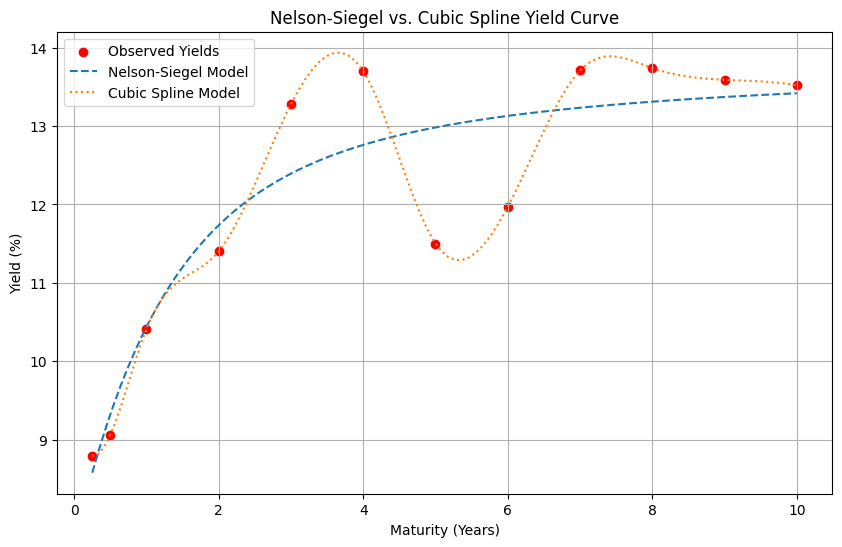

Nelson-Siegel RMSE: 0.7018
Cubic Spline RMSE: 0.0000


In [ ]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Bond Maturities (in years) and Corresponding Yields (in %)
maturities = np.array([0.25, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
yields = np.array([8.791, 9.058, 10.412, 11.4, 13.28, 13.7, 11.5, 11.97, 13.71, 13.74, 13.59, 13.52])

# Nelson-Siegel Model Definition
def nelson_siegel(t, beta0, beta1, beta2, tau):
    term1 = beta0
    term2 = beta1 * ((1 - np.exp(-t/tau)) / (t/tau))
    term3 = beta2 * (((1 - np.exp(-t/tau)) / (t/tau)) - np.exp(-t/tau))
    return term1 + term2 + term3

# Objective function to minimize
def ns_error(params):
    beta0, beta1, beta2, tau = params
    estimated_yields = nelson_siegel(maturities, beta0, beta1, beta2, tau)
    return np.sum((yields - estimated_yields)**2)

# Initial parameter guesses
initial_params = [10, -2, 2, 2]

# Optimize the parameters
result = opt.minimize(ns_error, initial_params, method='L-BFGS-B')

# Extract optimized parameters
beta0_opt, beta1_opt, beta2_opt, tau_opt = result.x
print(f"Optimized Parameters: beta0={beta0_opt:.4f}, beta1={beta1_opt:.4f}, beta2={beta2_opt:.4f}, tau={tau_opt:.4f}")

# Generate Nelson-Siegel Yield Curve
maturity_range = np.linspace(0.25, 10, 100)
ns_yield_curve = nelson_siegel(maturity_range, beta0_opt, beta1_opt, beta2_opt, tau_opt)

# Fit Cubic Spline
yield_spline = CubicSpline(maturities, yields)
cubic_spline_curve = yield_spline(maturity_range)

# Plot the Yield Curves
plt.figure(figsize=(10,6))
plt.scatter(maturities, yields, color='red', label='Observed Yields')
plt.plot(maturity_range, ns_yield_curve, label='Nelson-Siegel Model', linestyle='dashed')
plt.plot(maturity_range, cubic_spline_curve, label='Cubic Spline Model', linestyle='dotted')
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield (%)')
plt.title('Nelson-Siegel vs. Cubic Spline Yield Curve')
plt.legend()
plt.grid()
plt.show()

# Compute RMSE for both models
ns_rmse = np.sqrt(np.mean((yields - nelson_siegel(maturities, beta0_opt, beta1_opt, beta2_opt, tau_opt))**2))
spline_rmse = np.sqrt(np.mean((yields - yield_spline(maturities))**2))
print(f"Nelson-Siegel RMSE: {ns_rmse:.4f}")
print(f"Cubic Spline RMSE: {spline_rmse:.4f}")
